# Defining Analytical Occupations
### Fernando Garcia

## Client

Imagine that you are working for a nonprofit organization that focuses on research, policy, and practice in the field of Science, Technology, Engineering, and Mathematics (STEM) education. The organization has requested a report to enhance their understanding of analytical work.

## Task

For this exercise, you will provide a working definition of “analytical,” and you will explore how this characteristic is distributed across the workforce. To develop a definition of “analytical,” refer to the occupation-level characteristics collected in the O*NET database. The O*NET database is comprised of survey responses from experts and current employees about the requirements and responsibilities of each occupation. Once you arrive at a working definition of analytical, explore analytical jobs based on O*NET data and report your findings using the Standard Occupational Classification (SOC) system.

# Overview
The task above requests for a working definition of "analytical," utilizing occupation-level characteristics from the O\*Net Database to develop such a definition.
After viewing the online database, I decided to work with the skills, abilities, knowledge, and work activities datasets to create my definition of analytical. **Note: The datasets were originally in xlsx format, which I saved to my working directory as  comma-separated value files. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# import relevant datasets
skill_df = pd.read_csv('onet_skills.csv')
ability_df = pd.read_csv('onet_abilities.csv')
know_df = pd.read_csv('onet_knowledge.csv')
activities_df = pd.read_csv('onet_activities.csv')

## Exploratory Data Analysis
It is important to emphasize that, after manually exploring the dataset and understanding the approach of using select variables to create an analytical index, I decided early that I wanted to make a clear distinction between variables that come from each dataset to avoid inaccuracies from duplication or grouping. For instance, if an element with the same name presents itself in different datasets, although their data values represent distinct interpretations relevant to their respective datasets, future data grouping and calculations would not account for such distinction. Thus, I have decided early on to create a new column for each element in their dataset to represent the dataset from which they were imported.

In [3]:
# analyze columns and their values
skill_df['group'] = 'Skill'
skill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61110 entries, 0 to 61109
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      61110 non-null  object 
 1   Title               61110 non-null  object 
 2   Element ID          61110 non-null  object 
 3   Element Name        61110 non-null  object 
 4   Scale ID            61110 non-null  object 
 5   Scale Name          61110 non-null  object 
 6   Data Value          61110 non-null  float64
 7   N                   59640 non-null  float64
 8   Standard Error      59640 non-null  float64
 9   Lower CI Bound      59640 non-null  float64
 10  Upper CI Bound      59640 non-null  float64
 11  Recommend Suppress  61110 non-null  object 
 12  Not Relevant        30555 non-null  object 
 13  Date                61110 non-null  object 
 14  Domain Source       61110 non-null  object 
 15  group               61110 non-null  object 
dtypes: f

In [4]:
ability_df['group'] = 'Ability'
ability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90792 entries, 0 to 90791
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      90792 non-null  object 
 1   Title               90792 non-null  object 
 2   Element ID          90792 non-null  object 
 3   Element Name        90792 non-null  object 
 4   Scale ID            90792 non-null  object 
 5   Scale Name          90792 non-null  object 
 6   Data Value          90792 non-null  float64
 7   N                   88608 non-null  float64
 8   Standard Error      88608 non-null  float64
 9   Lower CI Bound      88608 non-null  float64
 10  Upper CI Bound      88608 non-null  float64
 11  Recommend Suppress  90792 non-null  object 
 12  Not Relevant        45396 non-null  object 
 13  Date                90792 non-null  object 
 14  Domain Source       90792 non-null  object 
 15  group               90792 non-null  object 
dtypes: f

In [5]:
know_df['group'] = 'Knowledge'
know_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57618 entries, 0 to 57617
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      57618 non-null  object 
 1   Title               57618 non-null  object 
 2   Element ID          57618 non-null  object 
 3   Element Name        57618 non-null  object 
 4   Scale ID            57618 non-null  object 
 5   Scale Name          57618 non-null  object 
 6   Data Value          57618 non-null  float64
 7   N                   56232 non-null  float64
 8   Standard Error      43692 non-null  float64
 9   Lower CI Bound      43047 non-null  float64
 10  Upper CI Bound      43047 non-null  float64
 11  Recommend Suppress  44946 non-null  object 
 12  Not Relevant        28809 non-null  object 
 13  Date                57618 non-null  object 
 14  Domain Source       57618 non-null  object 
 15  group               57618 non-null  object 
dtypes: f

In [6]:
activities_df['group'] = 'Work Activity'
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61110 entries, 0 to 61109
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      61110 non-null  object 
 1   Title               61110 non-null  object 
 2   Element ID          61110 non-null  object 
 3   Element Name        61110 non-null  object 
 4   Scale ID            61110 non-null  object 
 5   Scale Name          61110 non-null  object 
 6   Data Value          61110 non-null  float64
 7   N                   59640 non-null  float64
 8   Standard Error      59640 non-null  float64
 9   Lower CI Bound      59640 non-null  float64
 10  Upper CI Bound      59640 non-null  float64
 11  Recommend Suppress  61110 non-null  object 
 12  Not Relevant        30555 non-null  object 
 13  Date                61110 non-null  object 
 14  Domain Source       61110 non-null  object 
 15  group               61110 non-null  object 
dtypes: f

It is observed that the four datasets considered share the same column variables, and thus data cleaning can be performed on a concatenation of the datasets.

In [7]:
# concatenate the datasets
final_df = pd.concat([skill_df,ability_df,know_df,activities_df], ignore_index=True)
final_df

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,group
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,Skill
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst,Skill
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,Skill
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst,Skill
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,Skill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270625,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.b,Management of Financial Resources,LV,Level,1.12,8.0,0.13,0.88,1.37,N,N,08/2019,Analyst,Work Activity
270626,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,IM,Importance,2.00,8.0,0.00,2.00,2.00,N,NaN,08/2019,Analyst,Work Activity
270627,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,LV,Level,1.88,8.0,0.13,1.63,2.12,N,N,08/2019,Analyst,Work Activity
270628,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.d,Management of Personnel Resources,IM,Importance,2.88,8.0,0.13,2.63,3.12,N,NaN,08/2019,Analyst,Work Activity


In [8]:
# observe columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270630 entries, 0 to 270629
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   O*NET-SOC Code      270630 non-null  object 
 1   Title               270630 non-null  object 
 2   Element ID          270630 non-null  object 
 3   Element Name        270630 non-null  object 
 4   Scale ID            270630 non-null  object 
 5   Scale Name          270630 non-null  object 
 6   Data Value          270630 non-null  float64
 7   N                   264120 non-null  float64
 8   Standard Error      251580 non-null  float64
 9   Lower CI Bound      250935 non-null  float64
 10  Upper CI Bound      250935 non-null  float64
 11  Recommend Suppress  257958 non-null  object 
 12  Not Relevant        135315 non-null  object 
 13  Date                270630 non-null  object 
 14  Domain Source       270630 non-null  object 
 15  group               270630 non-nul

We can drop redundant and unneeded columns:

In [9]:
# drop unneeded columns
final_df = final_df.drop(['Element ID', 'Scale ID', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'], axis=1)
final_df

,O*NET-SOC Code,Title,Element Name,Scale Name,Data Value,N,group
0,11-1011.00,Chief Executives,Reading Comprehension,Importance,4.12,8.0,Skill
1,11-1011.00,Chief Executives,Reading Comprehension,Level,4.75,8.0,Skill
2,11-1011.00,Chief Executives,Active Listening,Importance,4.12,8.0,Skill
3,11-1011.00,Chief Executives,Active Listening,Level,4.88,8.0,Skill
4,11-1011.00,Chief Executives,Writing,Importance,4.00,8.0,Skill
...,...,...,...,...,...,...,...
270625,53-7121.00,"Tank Car, Truck, and Ship Loaders",Management of Financial Resources,Level,1.12,8.0,Work Activity
270626,53-7121.00,"Tank Car, Truck, and Ship Loaders",Management of Material Resources,Importance,2.00,8.0,Work Activity
270627,53-7121.00,"Tank Car, Truck, and Ship Loaders",Management of Material Resources,Level,1.88,8.0,Work Activity
270628,53-7121.00,"Tank Car, Truck, and Ship Loaders",Management of Personnel Resources,Importance,2.88,8.0,Work Activity


**check for missing values**
- we check the frequency to determine how much of the data is missing.

In [10]:
# view the percentage of missing values
final_df.isnull().mean()*100

O*NET-SOC Code    0.000000
Title             0.000000
Element Name      0.000000
Scale Name        0.000000
Data Value        0.000000
N                 2.405498
group             0.000000
dtype: float64

Only 2.4% of the elements contain missing sample size, which may be safe for deletion. An alternative approach would be to imputate on the mean as follows:

In [11]:
# observe rows with missing sample size
final_df[final_df['N'].isnull()].head(1000)

,O*NET-SOC Code,Title,Element Name,Scale Name,Data Value,N,group
1260,11-3071.00,"Transportation, Storage, and Distribution Mana...",Reading Comprehension,Importance,3.87,NaN,Skill
1261,11-3071.00,"Transportation, Storage, and Distribution Mana...",Reading Comprehension,Level,4.00,NaN,Skill
1262,11-3071.00,"Transportation, Storage, and Distribution Mana...",Active Listening,Importance,3.84,NaN,Skill
1263,11-3071.00,"Transportation, Storage, and Distribution Mana...",Active Listening,Level,3.96,NaN,Skill
1264,11-3071.00,"Transportation, Storage, and Distribution Mana...",Writing,Importance,3.62,NaN,Skill
...,...,...,...,...,...,...,...
23535,27-3023.00,"News Analysts, Reporters, and Journalists",Active Learning,Level,3.75,NaN,Skill
23536,27-3023.00,"News Analysts, Reporters, and Journalists",Learning Strategies,Importance,2.37,NaN,Skill
23537,27-3023.00,"News Analysts, Reporters, and Journalists",Learning Strategies,Level,2.38,NaN,Skill
23538,27-3023.00,"News Analysts, Reporters, and Journalists",Monitoring,Importance,3.44,NaN,Skill


In [12]:
# imputate on mean
final_df['N'].fillna(final_df['N'].mean(), inplace=True)

In [13]:
# verify no missing values
final_df.isnull().mean()*100

O*NET-SOC Code    0.0
Title             0.0
Element Name      0.0
Scale Name        0.0
Data Value        0.0
N                 0.0
group             0.0
dtype: float64

In [14]:
# anayze dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270630 entries, 0 to 270629
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   O*NET-SOC Code  270630 non-null  object 
 1   Title           270630 non-null  object 
 2   Element Name    270630 non-null  object 
 3   Scale Name      270630 non-null  object 
 4   Data Value      270630 non-null  float64
 5   N               270630 non-null  float64
 6   group           270630 non-null  object 
dtypes: float64(2), object(5)
memory usage: 14.5+ MB


In [15]:
# convert fields to suitable data types:
final_df['O*NET-SOC Code']  = final_df['O*NET-SOC Code'].astype('string')
final_df['Title']     = final_df['Title'].astype('string')
final_df['Element Name'] = final_df['Element Name'].astype('string')
final_df['Scale Name'] = final_df['Scale Name'].astype('string')
final_df['group'] = final_df['group'].astype('string')

Dataset is now ready for analysis.
We are especially concerned with elements to define analytical.

In [16]:
final_df['Element Name'].value_counts(dropna=False)

Mathematics                    5238
Quality Control Analysis       3492
Social Perceptiveness          3492
Writing                        3492
Operations Analysis            3492
                               ... 
Philosophy and Theology        1746
Visual Color Discrimination    1746
Telecommunications             1746
Communications and Media       1746
Transportation                 1746
Name: Element Name, Length: 119, dtype: Int64

To convert the data into a suitable format, we must pivot the data to have one row per occupation. The variables will instead represent columns of the dataset, with distinct columns for each level and importance score from elements from their respective dataset group.

In [17]:
# pivot data to have importance and level as columns
final_df = final_df.pivot_table(index=['O*NET-SOC Code', 'Title', 'Element Name', 'group'], columns='Scale Name', values = 'Data Value').reset_index()
final_df.columns.name = None
final_df

,O*NET-SOC Code,Title,Element Name,group,Importance,Level
0,11-1011.00,Chief Executives,Active Learning,Skill,4.00,4.75
1,11-1011.00,Chief Executives,Active Learning,Work Activity,4.00,4.75
2,11-1011.00,Chief Executives,Active Listening,Skill,4.12,4.88
3,11-1011.00,Chief Executives,Active Listening,Work Activity,4.12,4.88
4,11-1011.00,Chief Executives,Administration and Management,Knowledge,4.75,6.23
...,...,...,...,...,...,...
135310,53-7121.00,"Tank Car, Truck, and Ship Loaders",Wrist-Finger Speed,Ability,2.12,2.00
135311,53-7121.00,"Tank Car, Truck, and Ship Loaders",Writing,Skill,3.00,2.75
135312,53-7121.00,"Tank Car, Truck, and Ship Loaders",Writing,Work Activity,3.00,2.75
135313,53-7121.00,"Tank Car, Truck, and Ship Loaders",Written Comprehension,Ability,3.00,3.00


In [18]:
# Pivot the data to have one row per occupation, with level and importance values as columns
data_pivoted = final_df.pivot_table(index=["O*NET-SOC Code", "Title"], columns=["group", "Element Name"], values=["Importance", "Level"]).reset_index()
data_pivoted.columns = ["_".join(col).strip() if col[1] else col[0] for col in data_pivoted.columns.values]
data_pivoted

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Level_Work Activity_Science,Level_Work Activity_Service Orientation,Level_Work Activity_Social Perceptiveness,Level_Work Activity_Speaking,Level_Work Activity_Systems Analysis,Level_Work Activity_Systems Evaluation,Level_Work Activity_Technology Design,Level_Work Activity_Time Management,Level_Work Activity_Troubleshooting,Level_Work Activity_Writing
0,11-1011.00,Chief Executives,1.00,2.12,3.50,1.75,4.12,1.75,1.00,1.00,...,1.12,3.38,4.25,4.88,5.38,5.12,0.75,4.75,0.00,4.38
1,11-1011.03,Chief Sustainability Officers,1.00,2.00,3.12,1.50,3.88,2.00,1.00,1.00,...,1.88,3.25,3.88,4.12,4.00,4.00,1.12,3.88,0.00,4.25
2,11-1021.00,General and Operations Managers,2.00,2.12,3.00,1.75,3.75,2.00,1.00,1.62,...,1.12,3.12,4.00,4.00,3.00,3.12,1.12,3.75,1.38,3.88
3,11-2011.00,Advertising and Promotions Managers,1.38,1.75,3.38,1.12,3.88,1.75,1.00,1.00,...,0.62,3.25,4.00,4.12,3.12,3.75,0.75,3.88,0.00,3.88
4,11-2021.00,Marketing Managers,1.12,1.88,3.25,1.00,3.88,1.75,1.00,1.25,...,1.50,3.25,4.00,4.12,3.75,3.75,0.88,3.75,0.00,3.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,53-7071.00,Gas Compressor and Gas Pumping Station Operators,3.88,3.00,3.00,3.50,3.12,2.62,1.00,2.00,...,1.25,2.12,2.38,3.00,2.38,2.12,1.12,2.75,3.12,2.88
869,53-7072.00,"Pump Operators, Except Wellhead Pumpers",3.12,3.00,3.00,3.38,3.12,3.00,1.00,2.88,...,1.38,2.12,2.25,2.88,2.12,2.12,0.88,2.88,2.88,2.75
870,53-7073.00,Wellhead Pumpers,3.00,2.25,2.88,3.25,3.12,2.12,1.62,2.38,...,0.12,1.25,2.12,3.00,1.38,1.38,0.50,2.75,3.00,2.12
871,53-7081.00,Refuse and Recyclable Material Collectors,3.12,2.62,3.00,3.12,3.00,2.88,1.12,2.75,...,0.00,2.00,2.25,2.25,2.00,1.88,0.12,2.75,2.12,2.38


I then intuitively selected variables based on my definition of analytical, ensuring to specify the dataset in which I found the variable.

In [19]:
# select variables based on definition of analytical
selected_variables = [
    ('Skill','Active Listening'), ('Skill','Active Learning'), ('Skill','Critical Thinking'), ('Skill','Complex Problem Solving'), ('Skill','Operations Analysis'), ('Skill','Quality Control Analysis'), ('Skill','Judgment and Decision Making'), ('Skill','Systems Analysis'), ('Skill','Reading Comprehension'),
    ('Ability', 'Oral Comprehension'), ('Ability', 'Memorization'), ('Ability','Written Comprehension'), ('Ability','Problem Sensitivity'), ('Ability','Mathematical Reasoning'), ('Ability','Perceptual Speed'), ('Ability','Information Ordering'), ('Ability','Deductive Reasoning'), ('Ability','Inductive Reasoning'),('Ability','Visualization'),
    ('Knowledge', 'Mathematics'), ('Knowledge', 'Computers and Electronics'), ('Knowledge', 'Engineering and Technology'),
    ('Work Activity','Monitoring'), ('Work Activity','Operations Monitoring'), ('Work Activity','Programming'), ('Work Activity','Systems Analysis'), ('Work Activity','Systems Evaluation'), ('Work Activity','Technology Design'), ('Work Activity', 'Active Listening'), ('Work Activity', 'Active Learning'), ('Work Activity', 'Critical Thinking'), ('Work Activity', 'Quality Control Analysis'), ('Work Activity', 'Mathematics')
]

To standardize the data values, I went with the z-score normalization approach of taking the combined value of the importance and level subtracted by the mean of each element across all occupations, all divided by the standard deviation of each element across all occupations. 

In [20]:
# Compute the combined value of level and importance for each element
for group, var in selected_variables:
    data_pivoted[f"Combined_{group}_{var}"] = round(data_pivoted[f"Level_{group}_{var}"] * data_pivoted[f"Importance_{group}_{var}"],2)

# Compute the mean and standard deviation for each element
element_means = round(data_pivoted[[f"Combined_{group}_{var}" for group, var in selected_variables]].mean(),2)
element_stds = round(data_pivoted[[f"Combined_{group}_{var}" for group, var in selected_variables]].std(),2)

# Then, compute the z-scores for each element
for group, var in selected_variables:
    data_pivoted[f"Zscore_{group}_{var}"] = round((data_pivoted[f"Combined_{group}_{var}"] - element_means[f"Combined_{group}_{var}"]) / element_stds[f"Combined_{group}_{var}"],2)  

data_pivoted

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Zscore_Work Activity_Operations Monitoring,Zscore_Work Activity_Programming,Zscore_Work Activity_Systems Analysis,Zscore_Work Activity_Systems Evaluation,Zscore_Work Activity_Technology Design,Zscore_Work Activity_Active Listening,Zscore_Work Activity_Active Learning,Zscore_Work Activity_Critical Thinking,Zscore_Work Activity_Quality Control Analysis,Zscore_Work Activity_Mathematics
0,11-1011.00,Chief Executives,1.00,2.12,3.50,1.75,4.12,1.75,1.00,1.00,...,-0.83,-0.29,3.97,3.67,-0.35,1.89,2.19,2.14,-1.13,1.14
1,11-1011.03,Chief Sustainability Officers,1.00,2.00,3.12,1.50,3.88,2.00,1.00,1.00,...,-0.66,0.16,2.16,2.18,0.04,0.80,1.07,1.11,-0.84,0.47
2,11-1021.00,General and Operations Managers,2.00,2.12,3.00,1.75,3.75,2.00,1.00,1.62,...,0.15,-0.31,0.38,0.52,0.04,0.80,0.59,0.72,-0.23,-0.27
3,11-2011.00,Advertising and Promotions Managers,1.38,1.75,3.38,1.12,3.88,1.75,1.00,1.00,...,-1.32,-0.16,0.58,1.15,-0.35,1.05,0.78,0.98,-1.17,0.65
4,11-2021.00,Marketing Managers,1.12,1.88,3.25,1.00,3.88,1.75,1.00,1.25,...,-1.04,0.25,1.25,1.53,-0.24,0.79,1.43,0.98,-0.90,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,53-7071.00,Gas Compressor and Gas Pumping Station Operators,3.88,3.00,3.00,3.50,3.12,2.62,1.00,2.00,...,2.13,-0.41,-0.37,-0.85,0.04,-0.97,-0.87,-0.53,0.85,-0.56
869,53-7072.00,"Pump Operators, Except Wellhead Pumpers",3.12,3.00,3.00,3.38,3.12,3.00,1.00,2.88,...,1.90,-0.16,-0.69,-0.79,-0.18,-0.97,-0.51,-0.83,0.55,-0.20
870,53-7073.00,Wellhead Pumpers,3.00,2.25,2.88,3.25,3.12,2.12,1.62,2.38,...,2.13,-0.56,-1.32,-1.25,-0.62,-1.35,-1.32,-0.93,0.01,-0.83
871,53-7081.00,Refuse and Recyclable Material Collectors,3.12,2.62,3.00,3.12,3.00,2.88,1.12,2.75,...,0.50,-0.69,-0.98,-0.98,-0.91,-1.45,-1.34,-1.03,0.08,-1.56


I then created an analytical index by summing all z-scores for each distinct occupation.

In [21]:
# Finally, create the analytical index by summing all z-scores for each occupation
data_pivoted["analytical_index"] = round(data_pivoted[[f"Zscore_{group}_{var}" for group, var in selected_variables]].sum(axis=1),2)


data_pivoted

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Zscore_Work Activity_Programming,Zscore_Work Activity_Systems Analysis,Zscore_Work Activity_Systems Evaluation,Zscore_Work Activity_Technology Design,Zscore_Work Activity_Active Listening,Zscore_Work Activity_Active Learning,Zscore_Work Activity_Critical Thinking,Zscore_Work Activity_Quality Control Analysis,Zscore_Work Activity_Mathematics,analytical_index
0,11-1011.00,Chief Executives,1.00,2.12,3.50,1.75,4.12,1.75,1.00,1.00,...,-0.29,3.97,3.67,-0.35,1.89,2.19,2.14,-1.13,1.14,50.18
1,11-1011.03,Chief Sustainability Officers,1.00,2.00,3.12,1.50,3.88,2.00,1.00,1.00,...,0.16,2.16,2.18,0.04,0.80,1.07,1.11,-0.84,0.47,22.25
2,11-1021.00,General and Operations Managers,2.00,2.12,3.00,1.75,3.75,2.00,1.00,1.62,...,-0.31,0.38,0.52,0.04,0.80,0.59,0.72,-0.23,-0.27,10.62
3,11-2011.00,Advertising and Promotions Managers,1.38,1.75,3.38,1.12,3.88,1.75,1.00,1.00,...,-0.16,0.58,1.15,-0.35,1.05,0.78,0.98,-1.17,0.65,13.24
4,11-2021.00,Marketing Managers,1.12,1.88,3.25,1.00,3.88,1.75,1.00,1.25,...,0.25,1.25,1.53,-0.24,0.79,1.43,0.98,-0.90,0.37,21.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,53-7071.00,Gas Compressor and Gas Pumping Station Operators,3.88,3.00,3.00,3.50,3.12,2.62,1.00,2.00,...,-0.41,-0.37,-0.85,0.04,-0.97,-0.87,-0.53,0.85,-0.56,-10.38
869,53-7072.00,"Pump Operators, Except Wellhead Pumpers",3.12,3.00,3.00,3.38,3.12,3.00,1.00,2.88,...,-0.16,-0.69,-0.79,-0.18,-0.97,-0.51,-0.83,0.55,-0.20,-7.32
870,53-7073.00,Wellhead Pumpers,3.00,2.25,2.88,3.25,3.12,2.12,1.62,2.38,...,-0.56,-1.32,-1.25,-0.62,-1.35,-1.32,-0.93,0.01,-0.83,-21.10
871,53-7081.00,Refuse and Recyclable Material Collectors,3.12,2.62,3.00,3.12,3.00,2.88,1.12,2.75,...,-0.69,-0.98,-0.98,-0.91,-1.45,-1.34,-1.03,0.08,-1.56,-35.11


Afterwards, I utilized a Random Forest Regressor for feature selection, in which I observed how important each selected feature was in predicting the target label.

In [22]:
# set target as label we want our model to predict (analytical index) and predictors (selected variables/elements)
target = "analytical_index"
predictors = [f'Zscore_{group}_{var}' for group, var in selected_variables]

# Apply z-score normalization
X_normalized = data_pivoted[predictors]

# Use the normalized predictors for the model
X = X_normalized
y = data_pivoted[target]

# Fit the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

I then partitioned the data into training and test sets to determine the relationship of the variance in the target label to the selected variables.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=4, #reproduce the results
                                                   )

In [24]:
# Fit a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=4)
model.fit(X_train, y_train)
# predict labels for test set
y_pred   = model.predict(X_test)

# Evaluate predictions by calculating r^2 value
r2 = r2_score(y_test, y_pred)
print("The R^2 score of the model is: {}".format(r2.round(2)))


The R^2 score of the model is: 0.97


I fit the Random Forest Model and evaluated the R^2 to be approximately 0.97. For hypertuning parameters, I utilized a Randomized Search to build and output the best regression presents based on a range of randomly valued parameters.

In [25]:
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 20),
} # random search on parameter distributions
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=4),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    random_state=4,
    n_jobs=-1,  # Use all available CPU cores
)
# fit features to the random search. 
random_search.fit(X_train, y_train)
print("Best parameters found by random search:")
print(random_search.best_params_)

Best parameters found by random search:
{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 268}


In [26]:
#output best model based on random search in
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [27]:
# calculate r^2 of the model
r2 = r2_score(y_test, y_pred)
print("The R^2 score of the model is: {}".format(r2.round(2)))

The R^2 score of the model is: 0.97


I Then analyzed the feature importances on the best model, which included their percentage of correlation to predicting the target label.

In [28]:
# Analyze the feature importances on best model, and their percentage of correlation
feature_importances = pd.Series(best_model.feature_importances_, index=predictors)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

Zscore_Work Activity_Systems Evaluation          0.349755
Zscore_Skill_Complex Problem Solving             0.285124
Zscore_Ability_Deductive Reasoning               0.088354
Zscore_Skill_Systems Analysis                    0.079627
Zscore_Work Activity_Systems Analysis            0.057473
Zscore_Ability_Information Ordering              0.026499
Zscore_Skill_Judgment and Decision Making        0.022331
Zscore_Skill_Operations Analysis                 0.013179
Zscore_Work Activity_Mathematics                 0.009427
Zscore_Work Activity_Technology Design           0.007411
Zscore_Ability_Inductive Reasoning               0.007086
Zscore_Knowledge_Engineering and Technology      0.005277
Zscore_Ability_Mathematical Reasoning            0.004916
Zscore_Ability_Perceptual Speed                  0.004644
Zscore_Work Activity_Programming                 0.004281
Zscore_Skill_Critical Thinking                   0.004228
Zscore_Work Activity_Quality Control Analysis    0.003296
Zscore_Skill_Q

In [29]:
# Compute feature importances
importances = best_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(predictors, importances), key=lambda x: x[1], reverse=True)
sorted_features

# Print the top features
top_features = [feature for feature, importance in sorted_features[:23]]
print("Top features:", top_features)

Top features: ['Zscore_Work Activity_Systems Evaluation', 'Zscore_Skill_Complex Problem Solving', 'Zscore_Ability_Deductive Reasoning', 'Zscore_Skill_Systems Analysis', 'Zscore_Work Activity_Systems Analysis', 'Zscore_Ability_Information Ordering', 'Zscore_Skill_Judgment and Decision Making', 'Zscore_Skill_Operations Analysis', 'Zscore_Work Activity_Mathematics', 'Zscore_Work Activity_Technology Design', 'Zscore_Ability_Inductive Reasoning', 'Zscore_Knowledge_Engineering and Technology', 'Zscore_Ability_Mathematical Reasoning', 'Zscore_Ability_Perceptual Speed', 'Zscore_Work Activity_Programming', 'Zscore_Skill_Critical Thinking', 'Zscore_Work Activity_Quality Control Analysis', 'Zscore_Skill_Quality Control Analysis', 'Zscore_Work Activity_Critical Thinking', 'Zscore_Ability_Problem Sensitivity', 'Zscore_Ability_Visualization', 'Zscore_Knowledge_Mathematics', 'Zscore_Knowledge_Computers and Electronics']


I figured such results would be worthy of a visualization, and thus decided to visualze such features and the percentage of their correlation using a pie chart:

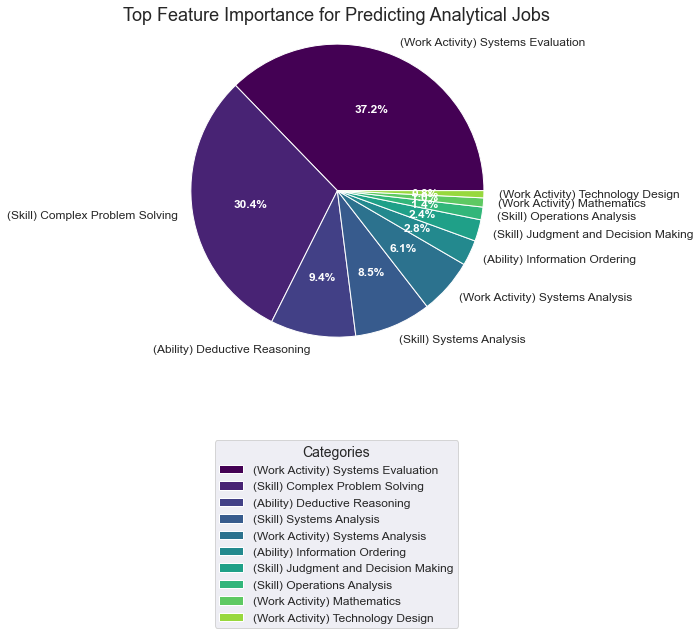

In [30]:
# function for reformatting our features for visualization
def reformat_feature_name(feature_name):
    parts = feature_name.split("_")
    new_name = f"({parts[1]}) {parts[2]}"
    return new_name


# generate dataframe with feature and importance as columns
feature_importances_df = pd.DataFrame(feature_importances, columns=["importance"])
feature_importances_df.reset_index(level=0, inplace=True)
feature_importances_df.columns = ["feature", "importance"]
feature_importances_df['feature'] = feature_importances_df['feature'].apply(reformat_feature_name)


# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 3, len(feature_importances_df['importance'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart with custom colors, font size, and percentage formatting
wedges, texts, autotexts = ax.pie(
    feature_importances_df['importance'].head(10),
    labels=feature_importances_df['feature'].head(10),
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 12},
)

# Customize the appearance of the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Set the title with a custom font size
plt.title('Top Feature Importance for Predicting Analytical Jobs', fontsize=18)

# Move the legend below the pie chart
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=12, title='Categories', title_fontsize=14)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
ax.axis('equal')

# Display the pie chart
plt.show()

I then updated my analytical index using only the top features; I was skeptical about which of these to choose and what the cutoff would be, so I decided to only omit the bottom few features by selecting the top 23. A more comprehensive approach for this method could be considered. 

In [31]:
# Update the analytical index using only the top features
data_pivoted["analytical_index_updated"] = sum(data_pivoted[feature] for feature in top_features)
data_pivoted

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Zscore_Work Activity_Systems Analysis,Zscore_Work Activity_Systems Evaluation,Zscore_Work Activity_Technology Design,Zscore_Work Activity_Active Listening,Zscore_Work Activity_Active Learning,Zscore_Work Activity_Critical Thinking,Zscore_Work Activity_Quality Control Analysis,Zscore_Work Activity_Mathematics,analytical_index,analytical_index_updated
0,11-1011.00,Chief Executives,1.00,2.12,3.50,1.75,4.12,1.75,1.00,1.00,...,3.97,3.67,-0.35,1.89,2.19,2.14,-1.13,1.14,50.18,32.95
1,11-1011.03,Chief Sustainability Officers,1.00,2.00,3.12,1.50,3.88,2.00,1.00,1.00,...,2.16,2.18,0.04,0.80,1.07,1.11,-0.84,0.47,22.25,15.15
2,11-1021.00,General and Operations Managers,2.00,2.12,3.00,1.75,3.75,2.00,1.00,1.62,...,0.38,0.52,0.04,0.80,0.59,0.72,-0.23,-0.27,10.62,5.26
3,11-2011.00,Advertising and Promotions Managers,1.38,1.75,3.38,1.12,3.88,1.75,1.00,1.00,...,0.58,1.15,-0.35,1.05,0.78,0.98,-1.17,0.65,13.24,8.45
4,11-2021.00,Marketing Managers,1.12,1.88,3.25,1.00,3.88,1.75,1.00,1.25,...,1.25,1.53,-0.24,0.79,1.43,0.98,-0.90,0.37,21.15,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,53-7071.00,Gas Compressor and Gas Pumping Station Operators,3.88,3.00,3.00,3.50,3.12,2.62,1.00,2.00,...,-0.37,-0.85,0.04,-0.97,-0.87,-0.53,0.85,-0.56,-10.38,-4.60
869,53-7072.00,"Pump Operators, Except Wellhead Pumpers",3.12,3.00,3.00,3.38,3.12,3.00,1.00,2.88,...,-0.69,-0.79,-0.18,-0.97,-0.51,-0.83,0.55,-0.20,-7.32,-3.74
870,53-7073.00,Wellhead Pumpers,3.00,2.25,2.88,3.25,3.12,2.12,1.62,2.38,...,-1.32,-1.25,-0.62,-1.35,-1.32,-0.93,0.01,-0.83,-21.10,-12.80
871,53-7081.00,Refuse and Recyclable Material Collectors,3.12,2.62,3.00,3.12,3.00,2.88,1.12,2.75,...,-0.98,-0.98,-0.91,-1.45,-1.34,-1.03,0.08,-1.56,-35.11,-23.39


I then normalized the updated index and fit a k-means clustering model using 3 clusters to classify the occupations. The labels were assigned by sorting the center of each cluster and then mapping them to an analytical category: low, moderately, and highly analytical.

In [32]:
# Normalize the updated analytical index
scaler = StandardScaler()
data_pivoted["analytical_index_score"] = scaler.fit_transform(data_pivoted[["analytical_index_updated"]])
                                                              
# Fit a k-means clustering model with 3 clusters (low, moderately, and highly analytical jobs)
kmeans = KMeans(n_clusters=3, random_state=4)
data_pivoted["cluster"] = kmeans.fit_predict(data_pivoted[["analytical_index_score"]])

# Get the sorted order of cluster centers
sorted_cluster_centers = sorted(enumerate(kmeans.cluster_centers_), key=lambda x: x[1])

# Create a dictionary to map cluster labels to analytical categories
cluster_label_map = {
    sorted_cluster_centers[0][0]: "low analytical",
    sorted_cluster_centers[1][0]: "moderately analytical",
    sorted_cluster_centers[2][0]: "highly analytical"
}

# Assign labels to the clusters
data_pivoted["analytical category"] = data_pivoted["cluster"].map(cluster_label_map)

# sort the dataset by analytical index scores and return results to show labeling of data
data_pivoted = data_pivoted.sort_values(by='analytical_index_score', ascending=False)
data_pivoted.head(20)

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Zscore_Work Activity_Active Listening,Zscore_Work Activity_Active Learning,Zscore_Work Activity_Critical Thinking,Zscore_Work Activity_Quality Control Analysis,Zscore_Work Activity_Mathematics,analytical_index,analytical_index_updated,analytical_index_score,cluster,analytical category
194,19-2012.00,Physicists,1.00,2.25,3.88,1.00,4.12,2.38,1.0,1.00,...,1.59,2.94,1.96,0.72,3.98,73.08,54.76,3.286418,0,highly analytical
157,17-2199.08,Robotics Engineers,3.12,2.50,3.88,3.00,4.00,2.75,1.0,1.00,...,0.67,1.65,1.52,2.59,2.50,67.03,54.17,3.251007,0,highly analytical
129,17-2031.00,Bioengineers and Biomedical Engineers,2.62,2.25,3.62,2.38,4.12,2.38,1.0,1.00,...,1.34,1.74,1.98,1.58,2.50,65.09,51.92,3.115966,0,highly analytical
130,17-2041.00,Chemical Engineers,1.75,2.62,4.00,1.62,4.00,2.12,1.0,1.00,...,0.14,1.65,1.80,1.24,2.65,57.92,48.40,2.904701,0,highly analytical
149,17-2141.02,Automotive Engineers,2.00,2.12,3.62,2.00,4.00,2.25,1.0,1.00,...,0.53,1.23,1.81,1.36,2.89,55.37,47.28,2.837481,0,highly analytical
144,17-2112.03,Manufacturing Engineers,2.50,2.88,4.00,2.50,4.00,2.62,1.0,1.88,...,0.79,1.51,0.58,1.83,2.67,59.65,45.97,2.758857,0,highly analytical
96,15-1221.00,Computer and Information Research Scientists,2.00,2.00,3.75,2.00,4.12,1.75,1.0,1.00,...,0.65,1.71,1.12,0.09,1.89,53.89,44.86,2.692236,0,highly analytical
147,17-2141.00,Mechanical Engineers,2.00,2.50,3.38,1.75,3.88,2.00,1.0,1.00,...,0.67,1.13,0.98,1.94,2.89,53.54,44.11,2.647223,0,highly analytical
127,17-2011.00,Aerospace Engineers,1.00,2.75,3.50,1.00,4.00,2.00,1.0,1.00,...,0.79,0.94,1.67,1.83,2.77,52.68,43.07,2.584804,0,highly analytical
156,17-2199.07,Photonics Engineers,2.62,1.88,3.62,2.62,4.00,2.50,1.0,1.00,...,0.65,1.96,1.66,1.67,2.59,53.48,42.98,2.579402,0,highly analytical


I then created relevant visualizations to provide insight on my results:

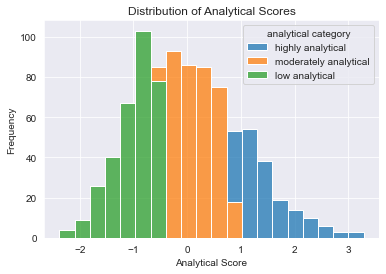

In [33]:
# histogram visualization for distribution of analytical scores 
sns.histplot(data_pivoted, x='analytical_index_score', hue='analytical category', bins=20, multiple="stack")
plt.title("Distribution of Analytical Scores")
plt.xlabel("Analytical Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\Fernando\AppData\Local\Temp\ipykernel_14564\3664135673.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_jobs = top_jobs.append(bottom_jobs)


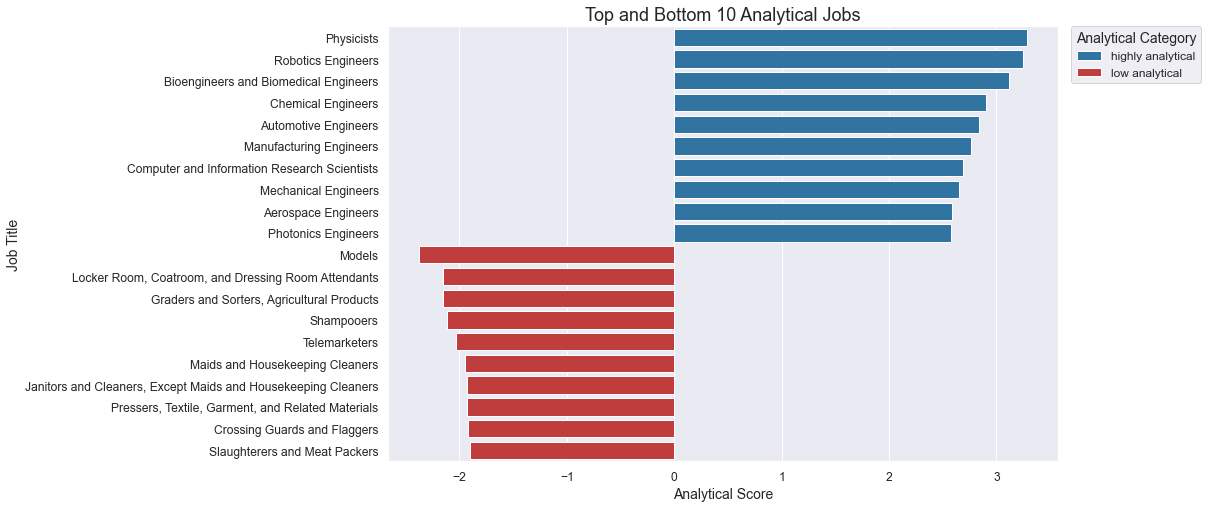

In [34]:
# Select top N and bottom N jobs
N = 10
top_jobs = data_pivoted.nlargest(N, 'analytical_index_score')
bottom_jobs = data_pivoted.nsmallest(N, 'analytical_index_score')
selected_jobs = top_jobs.append(bottom_jobs)

# Set a custom color palette
palette = {'low analytical': 'tab:red', 'highly analytical': 'tab:blue'}

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set(font_scale=1.1)
barplot = sns.barplot(data=selected_jobs, x='analytical_index_score', y='Title', hue='analytical category', dodge=False, palette=palette)
plt.title("Top and Bottom 10 Analytical Jobs", fontsize=18)
plt.xlabel("Analytical Score", fontsize=14)
plt.ylabel("Job Title", fontsize=14)

# Customize legend appearance and location
legend = plt.legend(title='Analytical Category', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Display the bar chart
plt.show()

The above bar chart demonstrates how engineering and scientist positions were classified as the highest analytical jobs, whereas models, housekeeping cleaners, and other labor jobs were classified as the least analytical.

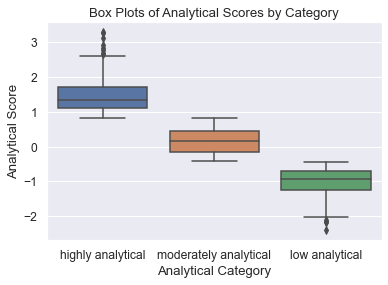

In [35]:
# Visualize box plots of analytical index score distribution
sns.boxplot(data=data_pivoted, x='analytical category', y='analytical_index_score')
plt.title("Box Plots of Analytical Scores by Category")
plt.xlabel("Analytical Category")
plt.ylabel("Analytical Score")
plt.show()

To observe specific characteristics of highly analytical jobs, I first filtered jobs by highly analytical and created a list of their O*NET-SOC Code in order to merge or group with other datasets:

In [36]:
# filter jobs by high analytical label for analysis
high_analytical_jobs = data_pivoted[data_pivoted["analytical category"] == "highly analytical"]
# Extract the O*NET-SOC Codes for high analytical jobs
high_analytical_onet_soc_codes = high_analytical_jobs["O*NET-SOC Code"].tolist()
# Print the list of O*NET-SOC Codes
print(high_analytical_onet_soc_codes)

['19-2012.00', '17-2199.08', '17-2031.00', '17-2041.00', '17-2141.02', '17-2112.03', '15-1221.00', '17-2141.00', '17-2011.00', '17-2199.07', '17-2151.00', '17-2161.00', '17-2072.00', '19-1021.00', '17-2121.00', '17-2051.02', '17-2199.09', '17-2051.01', '17-2051.00', '15-1299.08', '15-2011.00', '15-2021.00', '17-2199.06', '15-1241.00', '17-1011.00', '17-2141.01', '17-2021.00', '15-2031.00', '15-1244.00', '17-2061.00', '13-1081.01', '15-2041.01', '11-1011.00', '17-2199.05', '17-2131.00', '17-2112.01', '19-1029.02', '17-2111.02', '15-1251.00', '15-1211.00', '17-2199.10', '19-2011.00', '19-1029.01', '19-2099.01', '19-2032.00', '17-2199.03', '19-1013.00', '15-1211.01', '29-1229.05', '15-2041.00', '17-3024.01', '29-1217.00', '11-3051.01', '19-2043.00', '17-2111.00', '19-1042.00', '15-1242.00', '11-9041.00', '17-1022.01', '11-9121.02', '19-1022.00', '19-2041.03', '19-1041.00', '17-2171.00', '13-2099.01', '15-1243.00', '19-3032.00', '11-3021.00', '19-5011.00', '27-1021.00', '11-9199.11', '15-1

For my analysis, I decided to analyze education, training, and experience of jobs that were classified as highly analytical. I first imported the education, training, and experience file as a comma-delimited value file:

In [37]:
ete_df = pd.read_csv('Education, Training, and Experience.csv')
ete_df = ete_df.drop(['Element ID', 'Scale ID', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date', 'Domain Source'], axis=1)
ete_df.head(15)

,O*NET-SOC Code,Title,Element Name,Scale Name,Category,Data Value,N
0,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),1.0,0.00,27
1,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),2.0,0.00,27
2,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),3.0,0.00,27
3,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),4.0,6.05,27
4,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),5.0,4.23,27
5,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),6.0,21.61,27
6,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),7.0,13.66,27
7,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),8.0,25.83,27
8,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),9.0,19.23,27
9,11-1011.00,Chief Executives,Required Level of Education,Required Level Of Education (Categories 1-12),10.0,0.00,27


I performed some brief data cleaning on the relevant columns I would be using:

In [38]:
# analyze newly imported dataset
ete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35723 entries, 0 to 35722
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   O*NET-SOC Code  35723 non-null  object 
 1   Title           35723 non-null  object 
 2   Element Name    35723 non-null  object 
 3   Scale Name      35723 non-null  object 
 4   Category        34932 non-null  float64
 5   Data Value      35723 non-null  float64
 6   N               35723 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB


In [39]:
# convert fields to suitable data types:
ete_df['O*NET-SOC Code']  = ete_df['O*NET-SOC Code'].astype('string')
ete_df['Title']     = ete_df['Title'].astype('string')
ete_df['Element Name'] = ete_df['Element Name'].astype('string')
ete_df['Scale Name'] = ete_df['Scale Name'].astype('string')

I then filtered the data of the new dataset by highly analytical jobs based on the O*NET-SOC Code, and took the mean of each category across all highly analytical occupations.

In [40]:
# filter data in the education, training, experience dataset by labelled high analytical jobs
filtered_data = ete_df[ete_df['O*NET-SOC Code'].isin(high_analytical_onet_soc_codes)]
# Group by Element Name and Category, and calculate the mean Data Value
grouped_data = round(filtered_data.groupby(['Element Name', 'Category'])['Data Value'].mean(),2).reset_index()

grouped_data 

,Element Name,Category,Data Value
0,On-Site or In-Plant Training,1.0,20.67
1,On-Site or In-Plant Training,2.0,20.02
2,On-Site or In-Plant Training,3.0,12.70
3,On-Site or In-Plant Training,4.0,11.96
4,On-Site or In-Plant Training,5.0,12.77
5,On-Site or In-Plant Training,6.0,8.96
6,On-Site or In-Plant Training,7.0,7.15
7,On-Site or In-Plant Training,8.0,4.61
8,On-Site or In-Plant Training,9.0,1.16
9,On-the-Job Training,1.0,9.90


I then quickly retrieved the dataset that provided extensive information on education, training, and experience categories, and performed data cleaning:

In [41]:
# retrieve dataset that gives more information on education, training, and experience categories to get a detailed description
cat_df = pd.read_csv('Education, Training, and Experience Categories.csv')
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Element ID            41 non-null     object
 1   Element Name          41 non-null     object
 2   Scale ID              41 non-null     object
 3   Scale Name            41 non-null     object
 4   Category              41 non-null     int64 
 5   Category Description  41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [42]:
# convert fields to suitable data types:
cat_df['Element ID'] = cat_df['Element ID'].astype('string')
cat_df['Element Name'] = cat_df['Element Name'].astype('string')
cat_df['Scale ID'] = cat_df['Scale ID'].astype('string')
cat_df['Scale Name'] = cat_df['Scale Name'].astype('string')
cat_df['Category Description'] = cat_df['Category Description'].astype('string')



I then merged the two datasets:

In [43]:
# merge the two datasets
comp_df = grouped_data.merge(cat_df, on=['Element Name','Category'], how='left')
comp_df

,Element Name,Category,Data Value,Element ID,Scale ID,Scale Name,Category Description
0,On-Site or In-Plant Training,1.0,20.67,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),None
1,On-Site or In-Plant Training,2.0,20.02,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),Up to and including 1 month
2,On-Site or In-Plant Training,3.0,12.70,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 1 month, up to and including 3 months"
3,On-Site or In-Plant Training,4.0,11.96,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 3 months, up to and including 6 months"
4,On-Site or In-Plant Training,5.0,12.77,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 6 months, up to and including 1 year"
5,On-Site or In-Plant Training,6.0,8.96,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 1 year, up to and including 2 years"
6,On-Site or In-Plant Training,7.0,7.15,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 2 years, up to and including 4 years"
7,On-Site or In-Plant Training,8.0,4.61,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 4 years, up to and including 10 years"
8,On-Site or In-Plant Training,9.0,1.16,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),Over 10 years
9,On-the-Job Training,1.0,9.90,3.A.3,OJ,On-The-Job Training (Categories 1-9),None or short demonstration


I then dedicated my efforts to visualizing the results of the data for each of the four element types: education, on-the-job training, related work experience, and on-site or in-plant training:

In [44]:
# Check education level distribution; merge two datasets with level and category descriptions
edu_df = comp_df[(comp_df['Element Name'] == 'Required Level of Education')]
print(edu_df['Category Description'].unique())

<StringArray>
[                                                                                                                                                                                                                                                                         'Less than a High School Diploma',
                                                                                                                                                                                                                                               'High School Diploma - or the equivalent (for example, GED)',
 'Post-Secondary Certificate - awarded for training completed after high school (for example, in agriculture or natural resources, computer services, personal or culinary services, engineering technologies, healthcare, construction trades, mechanic and repair technologies, or precision production)',
                                                                                   

In [45]:
# shorten category description for better visualization
edu_df['Category Description'] = edu_df['Category Description'].apply(lambda x: x.split(' -')[0])

C:\Users\Fernando\AppData\Local\Temp\ipykernel_14564\1319386020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Category Description'] = edu_df['Category Description'].apply(lambda x: x.split(' -')[0])


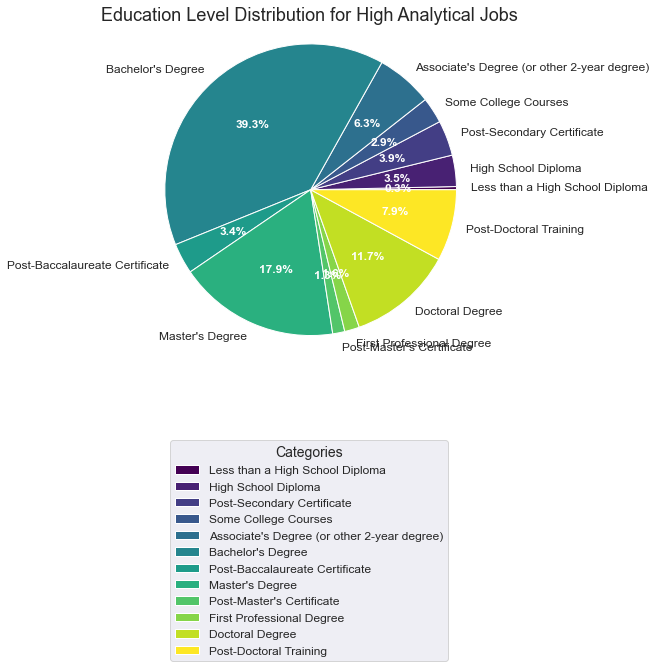

In [46]:
# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(edu_df['Category Description'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart with custom colors, font size, and percentage formatting
wedges, texts, autotexts = ax.pie(
    edu_df['Data Value'],
    labels=edu_df['Category Description'],
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 12}
)

# Customize the appearance of the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Set the title with a custom font size
plt.title('Education Level Distribution for High Analytical Jobs', fontsize=18)

# Move the legend below the pie chart
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=12, title='Categories', title_fontsize=14)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
ax.axis('equal')

# Display the pie chart
plt.show()

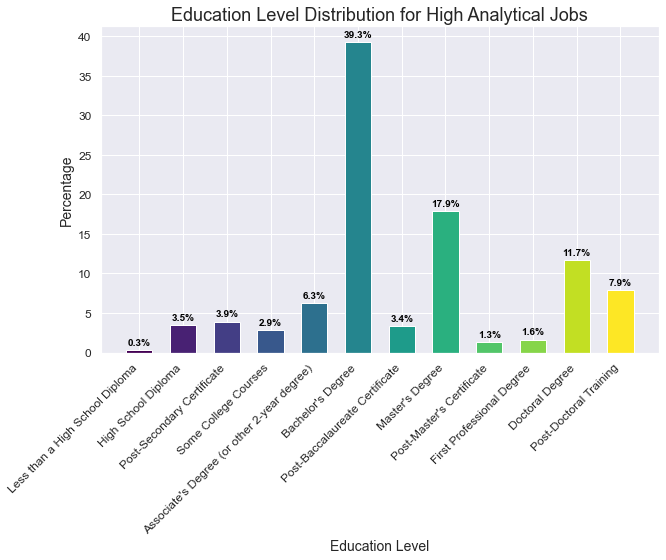

In [47]:
# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(edu_df['Category Description'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart with custom colors and bar width
bars = ax.bar(edu_df['Category Description'], edu_df['Data Value'], color=colors, width=0.6)

# Rotate x-axis labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=12, ha='right')

# Set the title and labels with custom font size
ax.set_title('Education Level Distribution for High Analytical Jobs', fontsize=18)
ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

# Customize y-axis ticks font size
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold',
    )

# Display the bar chart
plt.show()

The above visualizations both show how the required education level for most highly analytical jobs is a bachelor's degree or higher.

In [48]:
# observe required work experience level and its categories
exp_df = comp_df[(comp_df['Element Name'] == 'Related Work Experience')]
exp_df.head()

,Element Name,Category,Data Value,Element ID,Scale ID,Scale Name,Category Description
18,Related Work Experience,1.0,11.73,3.A.1,RW,Related Work Experience (Categories 1-11),None
19,Related Work Experience,2.0,0.39,3.A.1,RW,Related Work Experience (Categories 1-11),Up to and including 1 month
20,Related Work Experience,3.0,0.86,3.A.1,RW,Related Work Experience (Categories 1-11),"Over 1 month, up to and including 3 months"
21,Related Work Experience,4.0,2.04,3.A.1,RW,Related Work Experience (Categories 1-11),"Over 3 months, up to and including 6 months"
22,Related Work Experience,5.0,7.73,3.A.1,RW,Related Work Experience (Categories 1-11),"Over 6 months, up to and including 1 year"


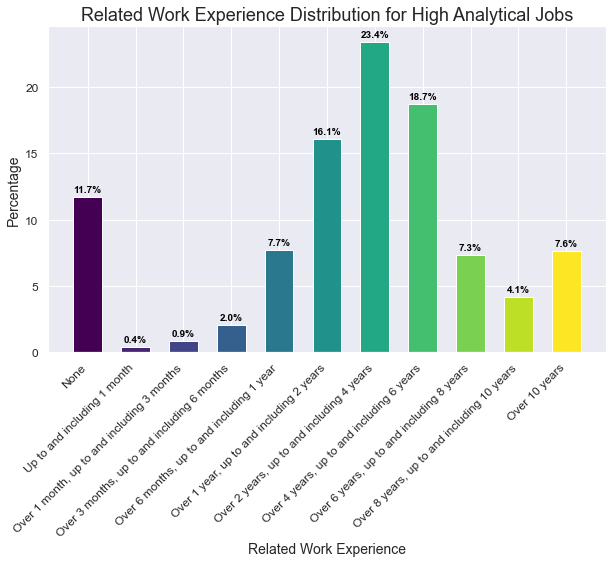

In [49]:
# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(exp_df['Category Description'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart with custom colors and bar width
bars = ax.bar(exp_df['Category Description'], exp_df['Data Value'], color=colors, width=0.6)

# Rotate x-axis labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=12, ha='right')

# Set the title and labels with custom font size
ax.set_title('Related Work Experience Distribution for High Analytical Jobs', fontsize=18)
ax.set_xlabel('Related Work Experience', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

# Customize y-axis ticks font size
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold',
    )

# Display the bar chart
plt.show()

The above visualization demonstrates that most highly analytical jobs require at least over a year of work experience.

In [50]:
# observe on the job training levels and its categories
otj_df = comp_df[(comp_df['Element Name'] == 'On-the-Job Training')]
otj_df.head()

,Element Name,Category,Data Value,Element ID,Scale ID,Scale Name,Category Description
9,On-the-Job Training,1.0,9.90,3.A.3,OJ,On-The-Job Training (Categories 1-9),None or short demonstration
10,On-the-Job Training,2.0,14.24,3.A.3,OJ,On-The-Job Training (Categories 1-9),"Anything beyond short demonstration, up to and..."
11,On-the-Job Training,3.0,14.38,3.A.3,OJ,On-The-Job Training (Categories 1-9),"Over 1 month, up to and including 3 months"
12,On-the-Job Training,4.0,15.02,3.A.3,OJ,On-The-Job Training (Categories 1-9),"Over 3 months, up to and including 6 months"
13,On-the-Job Training,5.0,19.42,3.A.3,OJ,On-The-Job Training (Categories 1-9),"Over 6 months, up to and including 1 year"


In [51]:
# shorten description for better visualization
otj_df.loc[otj_df['Category'] == 2, 'Category Description'] = 'Up to and including 1 month'

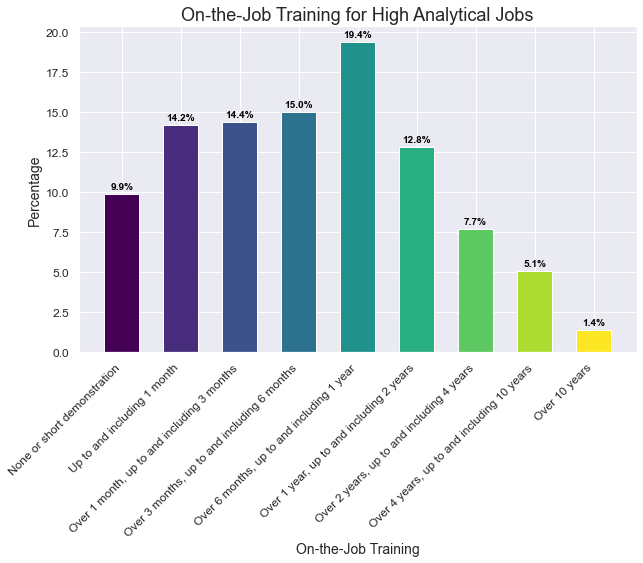

In [52]:
# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(otj_df['Category Description'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart with custom colors and bar width
bars = ax.bar(otj_df['Category Description'], otj_df['Data Value'], color=colors, width=0.6)

# Rotate x-axis labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=12, ha='right')

# Set the title and labels with custom font size
ax.set_title('On-the-Job Training for High Analytical Jobs', fontsize=18)
ax.set_xlabel('On-the-Job Training', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

# Customize y-axis ticks font size
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold',
    )

# Display the bar chart
plt.show()

The above visualization demonstrates how most highly analytical jobs include on-the-job training that can range from the first month to the first year. 

In [53]:
# observe on the on site or in person levels and its categories
osip_df = comp_df[(comp_df['Element Name'] == 'On-Site or In-Plant Training')]
osip_df.head()

,Element Name,Category,Data Value,Element ID,Scale ID,Scale Name,Category Description
0,On-Site or In-Plant Training,1.0,20.67,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),None
1,On-Site or In-Plant Training,2.0,20.02,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),Up to and including 1 month
2,On-Site or In-Plant Training,3.0,12.70,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 1 month, up to and including 3 months"
3,On-Site or In-Plant Training,4.0,11.96,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 3 months, up to and including 6 months"
4,On-Site or In-Plant Training,5.0,12.77,3.A.2,PT,On-Site Or In-Plant Training (Categories 1-9),"Over 6 months, up to and including 1 year"


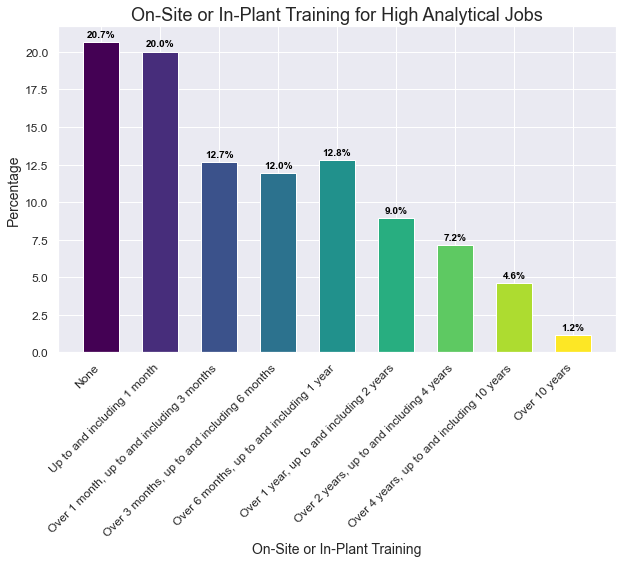

In [54]:
# Set a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(osip_df['Category Description'])))

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart with custom colors and bar width
bars = ax.bar(osip_df['Category Description'], osip_df['Data Value'], color=colors, width=0.6)

# Rotate x-axis labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=12, ha='right')

# Set the title and labels with custom font size
ax.set_title('On-Site or In-Plant Training for High Analytical Jobs', fontsize=18)
ax.set_xlabel('On-Site or In-Plant Training', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

# Customize y-axis ticks font size
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold',
    )

# Display the bar chart
plt.show()

This visualization demonstrates that most highly analytical jobs do not include on-site or in-plant training that can last from anywhere between the first day to a year.

As per required by the project, I then finally outputted 6-digit SOC Codes using the 2019 to SOC crosswalk: 

In [55]:
# observe high analytical jobs
high_analytical_jobs

,O*NET-SOC Code,Title,Importance_Ability_Arm-Hand Steadiness,Importance_Ability_Auditory Attention,Importance_Ability_Category Flexibility,Importance_Ability_Control Precision,Importance_Ability_Deductive Reasoning,Importance_Ability_Depth Perception,Importance_Ability_Dynamic Flexibility,Importance_Ability_Dynamic Strength,...,Zscore_Work Activity_Active Listening,Zscore_Work Activity_Active Learning,Zscore_Work Activity_Critical Thinking,Zscore_Work Activity_Quality Control Analysis,Zscore_Work Activity_Mathematics,analytical_index,analytical_index_updated,analytical_index_score,cluster,analytical category
194,19-2012.00,Physicists,1.00,2.25,3.88,1.00,4.12,2.38,1.00,1.00,...,1.59,2.94,1.96,0.72,3.98,73.08,54.76,3.286418,0,highly analytical
157,17-2199.08,Robotics Engineers,3.12,2.50,3.88,3.00,4.00,2.75,1.00,1.00,...,0.67,1.65,1.52,2.59,2.50,67.03,54.17,3.251007,0,highly analytical
129,17-2031.00,Bioengineers and Biomedical Engineers,2.62,2.25,3.62,2.38,4.12,2.38,1.00,1.00,...,1.34,1.74,1.98,1.58,2.50,65.09,51.92,3.115966,0,highly analytical
130,17-2041.00,Chemical Engineers,1.75,2.62,4.00,1.62,4.00,2.12,1.00,1.00,...,0.14,1.65,1.80,1.24,2.65,57.92,48.40,2.904701,0,highly analytical
149,17-2141.02,Automotive Engineers,2.00,2.12,3.62,2.00,4.00,2.25,1.00,1.00,...,0.53,1.23,1.81,1.36,2.89,55.37,47.28,2.837481,0,highly analytical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,17-3026.01,Nanotechnology Engineering Technologists and T...,3.13,2.38,3.31,3.38,3.69,2.12,1.19,1.56,...,-0.03,-0.05,0.08,1.50,1.08,16.70,13.80,0.828068,0,highly analytical
383,29-1215.00,Family Medicine Physicians,2.75,2.25,3.00,2.38,4.25,1.88,1.00,1.00,...,2.06,1.43,1.85,-0.45,0.21,27.98,13.78,0.826868,0,highly analytical
119,15-2051.01,Business Intelligence Analysts,1.00,1.62,3.75,1.00,3.88,1.38,1.00,1.00,...,0.79,1.29,1.12,-0.90,1.47,19.40,13.71,0.822667,0,highly analytical
47,11-9199.09,Wind Energy Operations Managers,2.38,2.25,3.00,2.25,3.75,2.12,1.00,2.00,...,0.80,0.14,0.72,0.85,0.65,20.52,13.68,0.820866,0,highly analytical


In [56]:
# read the O*NET-SOC 2019 dataset
soc_df = pd.read_csv('2019_to_SOC_Crosswalk.csv')
soc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   O*NET-SOC 2019 Code   1016 non-null   object
 1   O*NET-SOC 2019 Title  1016 non-null   object
 2   2018 SOC Code         1016 non-null   object
 3   2018 SOC Title        1016 non-null   object
dtypes: object(4)
memory usage: 31.9+ KB


In [57]:
# convert fields to suitable data types:
soc_df['O*NET-SOC 2019 Code']  = soc_df['O*NET-SOC 2019 Code'].astype('string')
soc_df['O*NET-SOC 2019 Title']     = soc_df['O*NET-SOC 2019 Title'].astype('string')
soc_df['2018 SOC Code'] = soc_df['2018 SOC Code'].astype('string')
soc_df['2018 SOC Title'] = soc_df['2018 SOC Title'].astype('string')


In [58]:
# rename common column between datasets for merging process 
soc_df = soc_df.rename(columns={'O*NET-SOC 2019 Code':'O*NET-SOC Code'})

In [59]:
# merge the two datasets by common O*NET SOC Code columns
crosswalk_df = high_analytical_jobs.merge(soc_df, on=['O*NET-SOC Code'], how='left')

# rename output column to better reflect desired 6-digit output
crosswalk_df = crosswalk_df.rename(columns={'2018 SOC Code':'6-digit SOC Code'})

In [60]:
# return output with relevant values
crosswalk_df = crosswalk_df[['6-digit SOC Code','analytical_index_score','analytical category']]
crosswalk_df

,6-digit SOC Code,analytical_index_score,analytical category
0,19-2012,3.286418,highly analytical
1,17-2199,3.251007,highly analytical
2,17-2031,3.115966,highly analytical
3,17-2041,2.904701,highly analytical
4,17-2141,2.837481,highly analytical
...,...,...,...
177,17-3026,0.828068,highly analytical
178,29-1215,0.826868,highly analytical
179,15-2051,0.822667,highly analytical
180,11-9199,0.820866,highly analytical
